In [15]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# TODO: ver que onda los warnings
import warnings
warnings.filterwarnings('ignore')


plt.style.use('default') 
plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn
def plot_heatmap(df, x, y, z, label_x='x', label_y='y', label_z='z', title='titulo', color='hot_r', invert_color=False):
    fig, ax = plt.subplots(figsize=(14,14))
    graph = sns.heatmap(df.pivot_table(index=y,columns=x,values=z),\
    linewidths=.5,cmap=color, ax=ax, cbar_kws={'label': label_z}, annot=False)
    ax.set_xlabel(label_x);
    ax.set_ylabel(label_y);
    ax.set_title(title)
    if invert_color:
        ax.invert_yaxis()

In [2]:
types= {
    "event": "category", 
    "model": "category", 
    "condition": "category", 
    "color": "category", 
    "storage": "category",
}
parse_dates = ['timestamp']
df_events = pd.read_csv('./fiuba-trocafone-tp1-final-set/events.csv', dtype=types, low_memory=False, parse_dates=parse_dates)

In [3]:
df_events['year'] = df_events['timestamp'].dt.year
df_events['month'] = df_events['timestamp'].dt.month
df_events['day'] = df_events['timestamp'].dt.day
df_events['time'] = df_events['timestamp'].dt.time

In [4]:
df_events.columns

Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version', 'year', 'month', 'day',
       'time'],
      dtype='object')

#### Como hay solo 202 valores distintos, pero se contaron 564284 valores, lo tomo como un categorico

# Hora pico del uso de la pagina semanalmente.

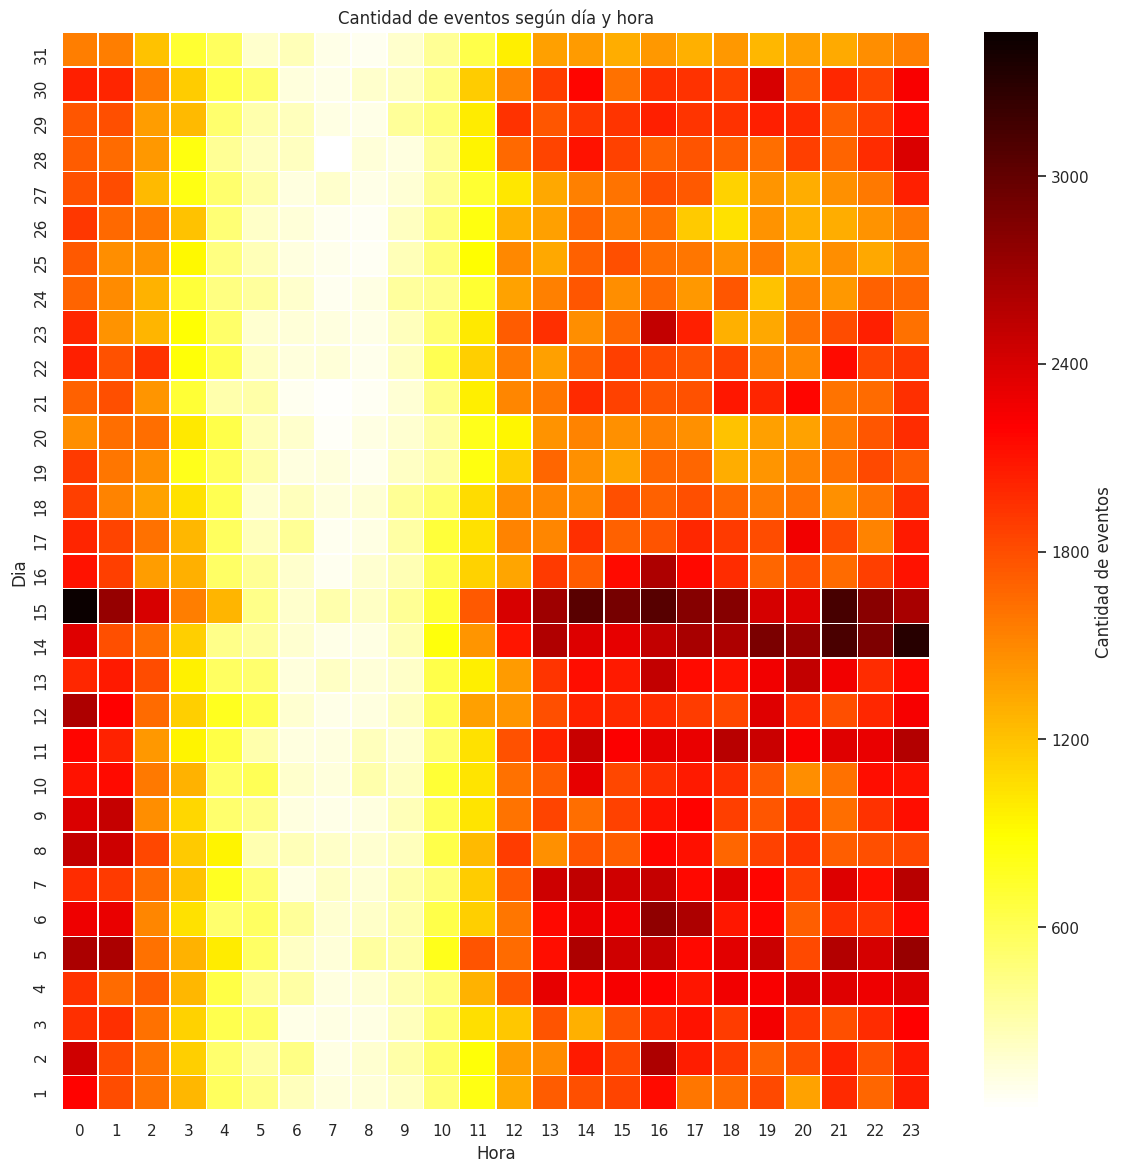

In [19]:
df_horaPico = df_events[['timestamp', 'day', 'event']]
df_horaPico['hour'] = df_horaPico['timestamp'].dt.hour
df_horaPico.drop('timestamp', axis='columns', inplace=True)
df_horaPico = df_horaPico.groupby(['hour', 'day']).agg({'day':'count'})
df_horaPico.columns = ['count']
df_horaPico.reset_index(inplace=True)
df_horaPico

plot_heatmap(df_horaPico,  x='hour', y='day', z='count', title='Cantidad de eventos según día y hora', label_x='Hora',label_y='Dia',label_z='Cantidad de eventos',invert_color=True)

In [6]:
df_horaPico = df_events[['timestamp', 'day', 'event']]
df_horaPico['hour'] = df_horaPico['timestamp'].dt.hour
df_horaPico.drop('timestamp', axis='columns', inplace=True)

In [7]:
df_conversions = df_horaPico[df_horaPico['event']=='conversion']
conversions_ser = df_conversions.groupby('hour').agg({'event': 'count'})
conversions_ser.reset_index(inplace=True)
conversions_ser.columns = ['hour', 'count']

df_viewed = df_horaPico[df_horaPico['event']=='viewed product']
viewed_ser = df_viewed.groupby('hour').agg({'event': 'count'})
viewed_ser.reset_index(inplace=True)
viewed_ser.columns = ['hour','count']

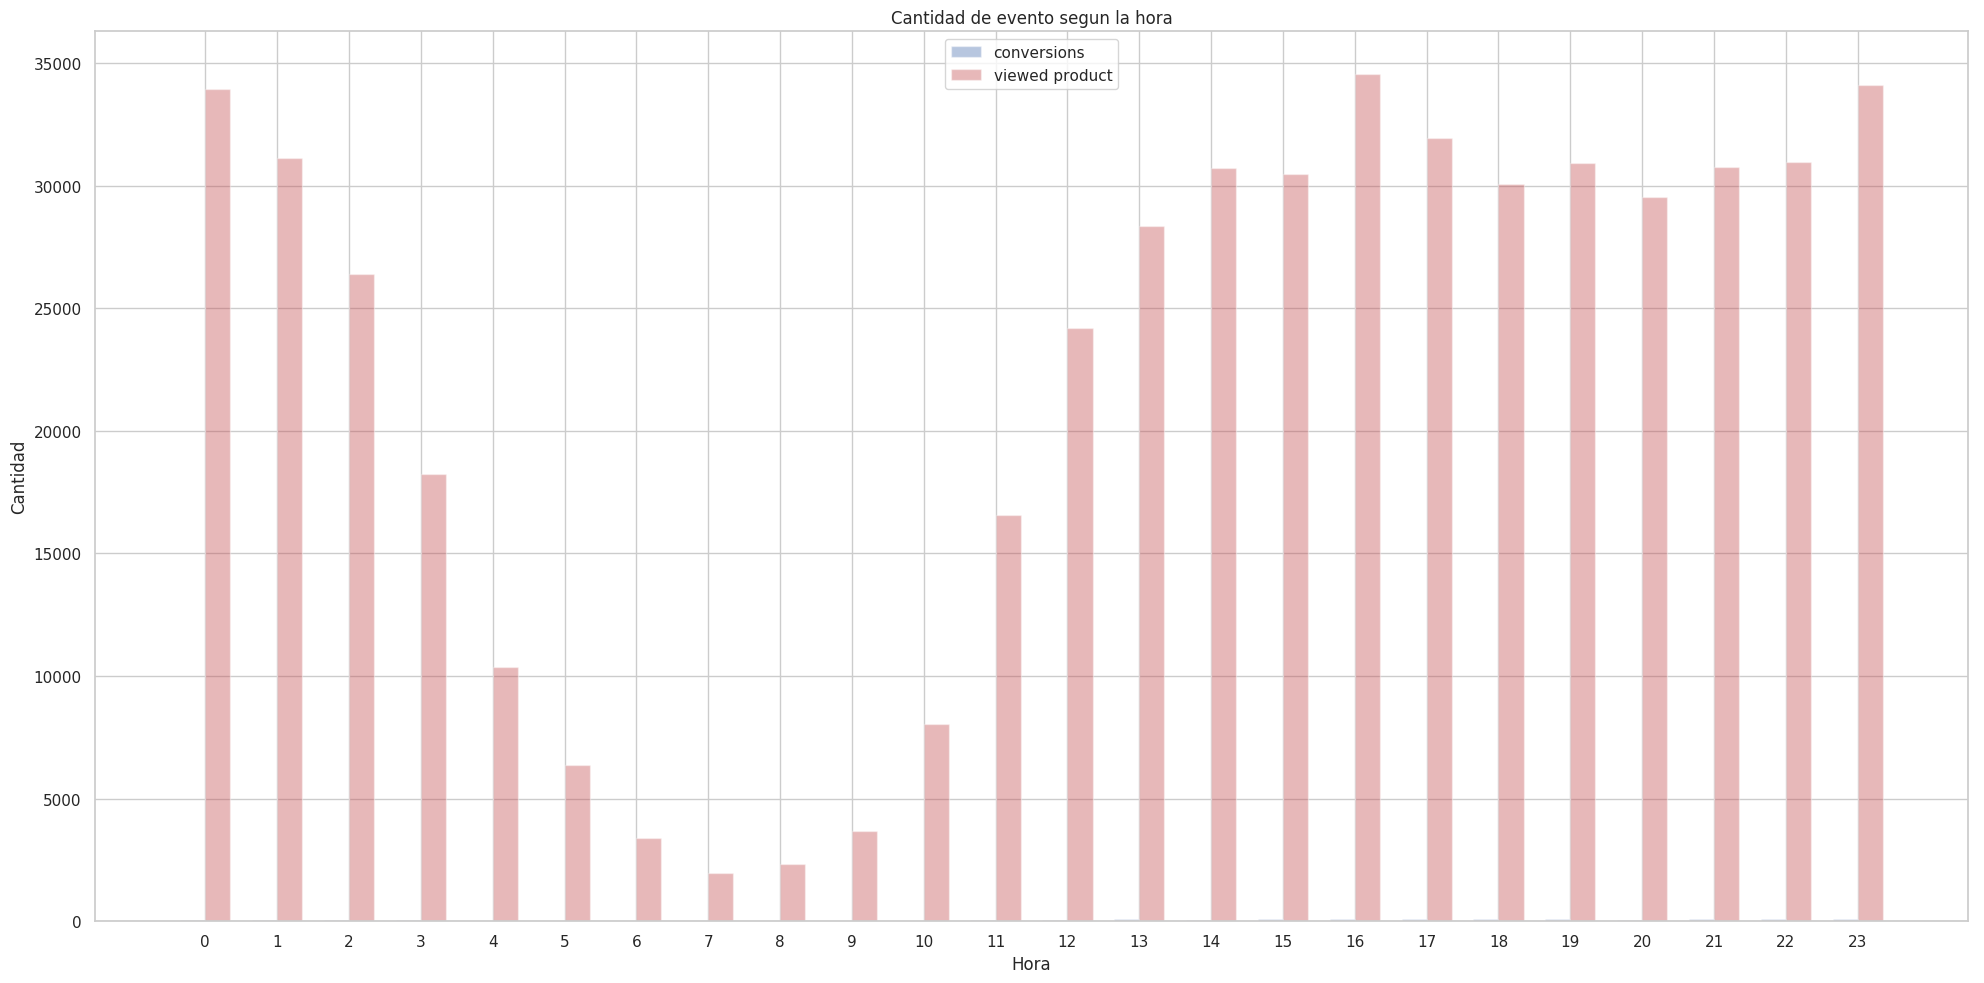

In [16]:
index = viewed_ser['hour'].values

fig, ax = plt.subplots()
bar_width = 0.35

opacity = 0.4

rects1 = ax.bar(index, conversions_ser['count'].values, bar_width,
                alpha=opacity, color='b',
                label='conversions')

rects2 = ax.bar(index + bar_width, viewed_ser['count'].values, bar_width,
                alpha=opacity, color='r',
                label='viewed product')

ax.set_xlabel('Hora')
ax.set_ylabel('Cantidad')
ax.set_title('Cantidad de evento segun la hora')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(index)
ax.legend()

fig.tight_layout()
plt.show()

In [9]:
k = (viewed_ser['count']/conversions_ser['count']).mean()

## La relacion entre visitas y compras es de 15.54 en promedio

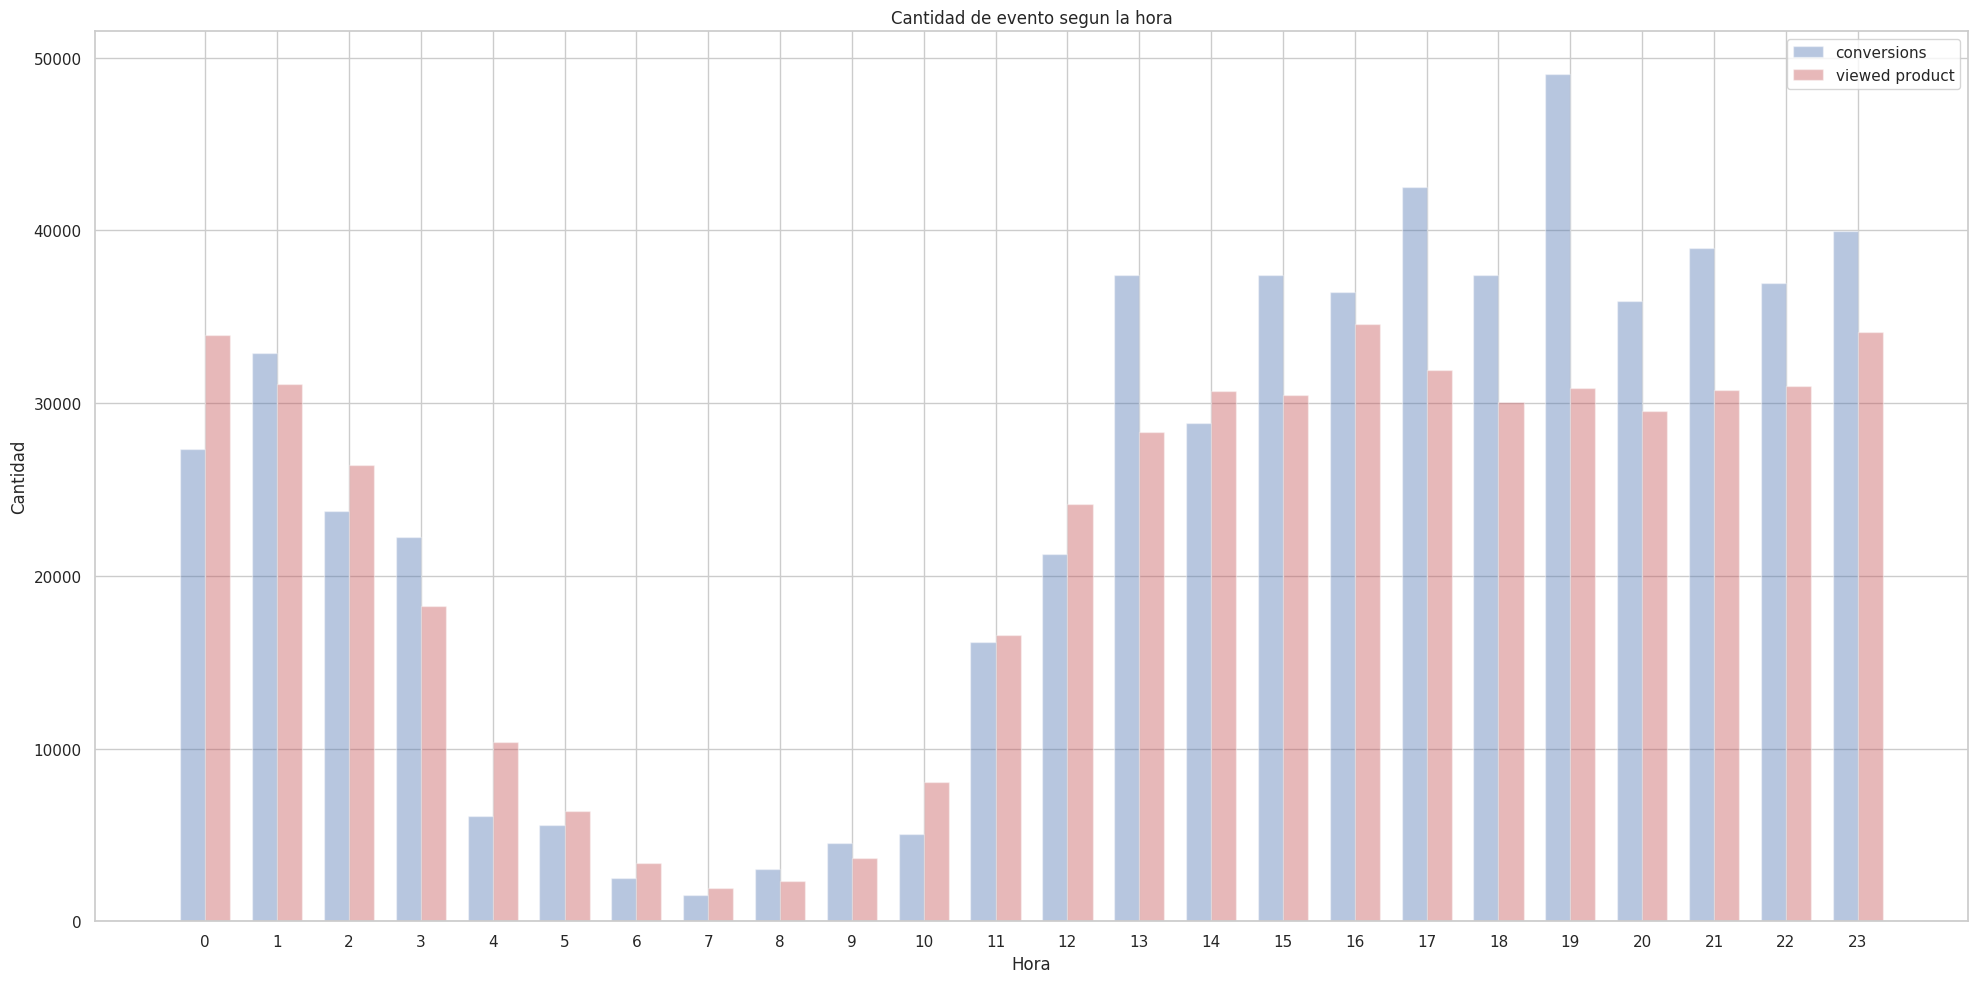

In [17]:
index = viewed_ser['hour'].values

fig, ax = plt.subplots()
bar_width = 0.35

opacity = 0.4

rects1 = ax.bar(index, conversions_ser['count'].values * k, bar_width,
                alpha=opacity, color='b',
                label='conversions')

rects2 = ax.bar(index + bar_width, viewed_ser['count'].values, bar_width,
                alpha=opacity, color='r',
                label='viewed product')

ax.set_xlabel('Hora')
ax.set_ylabel('Cantidad')
ax.set_title('Cantidad de evento segun la hora')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(index)
ax.legend()

fig.tight_layout()
plt.show()

## Busqueda de compradores mayoristas

In [11]:
df_mayoristas = df_events[df_events['event'] == 'conversion']['person'].value_counts()
df_mayoristas.head(10)

252adec6    15
4200bdee    12
a0d4baef    11
ba325a6b    10
f646efa2     8
d12fbe38     8
a96e304b     8
e883f03a     7
baa40260     7
a7713c81     7
Name: person, dtype: int64

In [12]:
adicto = df_events[(df_events['person'] == '252adec6') & (df_events['event'] == 'conversion')]
[
    adicto['timestamp'].max()-
    adicto['timestamp'].min(),
    df_events['timestamp'].min(),
    df_events['timestamp'].max(),
]
adicto['timestamp'];


In [13]:
adicto2 = df_events[(df_events['person'] == '4200bdee') & (df_events['event'] == 'conversion')]
[
    adicto2['timestamp'].max()-
    adicto2['timestamp'].min(),
    df_events['timestamp'].min(),
    df_events['timestamp'].max(),
]
adicto2['timestamp'];

In [14]:
adicto3 = df_events[(df_events['person'] == 'a0d4baef') & (df_events['event'] == 'conversion')]
[
    adicto3['timestamp'].max()-
    adicto3['timestamp'].min(),
    df_events['timestamp'].min(),
    df_events['timestamp'].max(),
]
adicto3['timestamp'];

In [254]:
# Ver como mostrar adicto, adicto2, adicto3
# Un grafico cada uno?
